20161206

# A COMPARE-AGGREGATE MODEL FOR MATCHING TEXT SEQUENCES
# 用于匹配文本序列的比较-聚合模型


## ABSTRACT
Many NLP tasks including machine comprehension, answer selection and text entailment require the comparison between sequences. Matching the important units between sequences is a key to solve these problems. In this paper, we present a general “compare-aggregate” framework that performs word-level matching followed by aggregation using Convolutional Neural Networks. We particularly focus on the different comparison functions we can use to match two vectors. We use four different datasets to evaluate the model. We find that some simple comparison functions based on element-wise operations can work better than standard neural network and neural tensor network.
## 摘要
许多NLP任务包括机器理解、答案选择和文本蕴涵都需要序列间的比较。序列间重要单元的匹配是解决这些问题的关键。在本文中，我们提出了一个通用的“比较-聚合”框架，该框架使用卷积神经网络进行词级匹配和聚合。我们特别关注可以用来匹配两个向量的不同比较函数。我们使用四个不同的数据集来评估模型。我们发现一些简单的基于元素智能操作的比较函数比标准神经网络和神经张量网络更有效。


## 1 INTRODUCTION
Many natural language processing problems involve matching two or more sequences to make a decision. For example, in textual entailment, one needs to determine whether a hypothesis sentence can be inferred from a premise sentence. In machine comprehension, given a passage, a question needs to be matched against it in order to find the correct answer. Table 1 gives two example sequence matching problems. In the first example, a passage, a question and four candidate answers are given. We can see that to get the correct answer, we need to match the question against the passage and identify the last sentence to be the answer-bearing sentence. In the second example, given a question and a set of candidate answers, we need to find the answer that best matches the question. Because of the fundamental importance of comparing two sequences of text to judge their semantic similarity or relatedness, sequence matching has been well studied in natural language processing.

With recent advances of neural network models in natural language processing, a standard practice for sequence modeling now is to encode a sequence of text as an embedding vector using models such as RNN and CNN. To match two sequences, a straightforward approach is to encode each sequence as a vector and then to combine the two vectors to make a decision . However, it has been found that using a single vector to encode an entire sequence is not sufficient to capture all the important information from the sequence, and therefore advanced techniques such as attention mechanisms and memory networks have been applied to sequence matching problems.

A common trait of a number of these recent studies on sequence matching problems is the use of a “compare-aggregate” framework. In such a framework, comparison of two sequences is not done by comparing two vectors each representing an entire sequence. Instead, these models first compare vector representations of smaller units such as words from these sequences and then aggregate these comparison results to make the final decision. For example, the match-LSTM model proposed by Wang & Jiang (2016b) for textual entailment first compares each word in the hypothesis with an attention-weighted version of the premise. The comparison results are then aggregated through an LSTM. He & Lin (2016) proposed a pairwise word interaction model that first takes each pair of words from two sequences and applies a comparison unit on the two words. It then combines the results of these word interactions using a similarity focus layer followed by a multi-layer CNN. Parikh et al. (2016) proposed a decomposable attention model for textual entailment, in which words from each sequence are compared with an attention-weighted version of the other sequence to produce a series of comparison vectors. The comparison vectors are then aggregated and fed into a feed forward network for final classification.

Although these studies have shown the effectiveness of such a “compare-aggregate” framework for sequence matching, there are at least two limitations with these previous studies: (1) Each of the models proposed in these studies is tested on one or two tasks only, but we hypothesize that this general framework is effective on many sequence matching problems. There has not been any study that empirically verifies this. (2) More importantly, these studies did not pay much attention to the comparison function that is used to compare two small textual units. Usually a standard feedforward network is used to combine two vectors representing two units that need to be compared, e.g., two words. However, based on the nature of these sequence matching problems, we essentially need to measure how semantically similar the two sequences are. Presumably, this property of these sequence matching problems should guide us in choosing more appropriate comparison functions. Indeed He & Lin (2016) used cosine similarity, Euclidean distance and dot product to define the comparison function, which seem to be better justifiable. But they did not systematically evaluate these similarity or distance functions or compare them with a standard feedforward network.

In this paper, we argue that the general “compare-aggregate” framework is effective for a wide range of sequence matching problems. We present a model that follows this general framework and test it on four different datasets, namely, MovieQA, InsuranceQA, WikiQA and SNLI. The first three datasets are for Question Answering, but the setups of the tasks are quite different. The last dataset is for textual entailment. More importantly, we systematically present and test six different comparison functions. We find that overall a comparison function based on element-wise subtraction and multiplication works the best on the four datasets.

The contributions of this work are twofold: (1) Using four different datasets, we show that our model following the “compare-aggregate” framework is very effective when compared with the state-of-the-art performance on these datasets. (2) We conduct systematic evaluation of different comparison functions and show that a comparison function based on element-wise operations, which is not widely used for word-level matching, works the best across the different datasets. We believe that these findings will be useful for future research on sequence matching problems. We have also made our code available online.

## 1介绍
许多自然语言处理问题涉及到匹配两个或多个序列来做出决策。例如，在文本蕴涵中，我们需要确定假设句是否可以从前提句中推断出来。在机器理解中，给定一篇文章，为了找到正确答案，需要将问题与之进行匹配。表1给出了两个序列匹配问题的示例。在第一个例子中，给出了一篇文章、一个问题和四个备选答案。我们可以看到，为了得到正确的答案，我们需要将问题与文章进行匹配，并将最后一个句子确定为包含答案的句子。在第二个示例中，给定一个问题和一组候选答案，我们需要找到与问题最匹配的答案。由于比较两个文本序列对判断它们的语义相似度或亲缘性具有根本的重要性，序列匹配在自然语言处理中得到了广泛的研究。

随着神经网络模型在自然语言处理中的最新进展，序列建模的一个标准实践是使用RNN和CNN等模型将文本序列编码为嵌入向量。为了匹配两个序列，一种简单的方法是将每个序列编码为一个向量，然后将这两个向量组合起来做出决策。然而，使用单个向量对整个序列进行编码并不足以捕获序列中的所有重要信息，因此，注意力机制和记忆网络等先进技术已被应用于序列匹配问题。

最近关于序列匹配问题的许多研究的一个共同特点是使用了“比较-聚合”框架。在这样的框架中，两个序列的比较不是通过比较代表整个序列的两个向量来完成的。相反，这些模型首先比较较小单位的向量表示，如来自这些序列的单词，然后汇总这些比较结果，以做出最终决定。例如，Wang & Jiang (2016b)提出的文本隐含的match-LSTM模型首先将假设中的每个单词与前提的注意加权版本进行比较。然后通过LSTM聚合比较结果。何林(2016)提出了一种成对词的交互模型，该模型首先从两个序列中提取每一对词，并在两个词上应用一个比较单元。然后，它使用一个相似焦点层和一个多层CNN组合这些单词交互的结果。Parikh等人(2016)提出了一种文本隐含的可分解注意模型，将每个序列中的单词与另一个序列的注意加权版本进行比较，从而产生一系列比较向量。然后，将比较向量聚合到前馈网络中进行最终分类。

虽然这些研究表明这种“compare-aggregate”框架的有效性序列匹配,至少有两个局限性与这些先前的研究:(1)中的每个模型提出这些研究只是测试一个或两个任务,但是我们假设这个总体框架在许多序列匹配问题是有效的。还没有任何研究以经验证明这一点。(2)更重要的是，这些研究并没有过多关注用于比较两个小文本单位的比较函数。通常使用一个标准的前馈网络来组合两个表示需要比较的两个单元的向量，例如，两个单词。然而，基于这些序列匹配问题的性质，我们本质上需要度量两个序列在语义上的相似程度。想必，这些序列匹配问题的这个性质应该能够指导我们选择更合适的比较函数。确实，He & Lin(2016)使用余弦相似度、欧几里德距离和点积来定义比较函数，似乎更有道理。但他们没有系统地评估这些相似度或距离函数，也没有将它们与标准的前馈网络进行比较。

在这篇论文中，我们认为一般的“比较-聚合”框架对于广泛的序列匹配问题是有效的。我们提出了一个遵循这个通用框架的模型，并在四个不同的数据集上测试它，即MovieQA、InsuranceQA、WikiQA和SNLI。前三个数据集用于回答问题，但是任务的设置有很大的不同。最后一个数据集用于文本加密。更重要的是，我们系统地展示和测试了六种不同的比较函数。我们发现，总的来说，基于元素的减法和乘法的比较函数在四个数据集上表现最好。

这项工作的贡献是双重的:(1)使用四个不同的数据集，我们表明，我们的模型遵循“比较-聚合”框架是非常有效的，相比于这些数据集的最新性能。(2)我们对不同的比较函数进行了系统的评价，结果表明，基于元素级操作的比较函数在不同的数据集上表现最好，但在词级匹配中应用并不广泛。我们相信，这些发现将有助于今后序列匹配问题的研究。我们还在网上提供了我们的代码。

## 2 METHOD
In this section, we propose a general model following the “compare-aggregate” framework for matching two sequences. This general model can be applied to different tasks. We focus our discussion on six different comparison functions that can be plugged into this general “compare-aggregate” model. In particular, we hypothesize that two comparison functions based on element-wise operations, SUB and MULT, are good middle ground between highly flexible functions using standard neural network models and highly restrictive functions based on cosine similarity and/or Euclidean distance. As we will show in the experiment section, these comparison functions based on elementwise operations can indeed perform very well on a number of sequence matching problems.

### 2.1 PROBLEM DEFINITION AND MODEL OVERVIEW
The general setup of the sequence matching problem we consider is the following. We assume there are two sequences to be matched. We use two matrices Q ∈ Rd×Q and A ∈ Rd×A to represent the word embeddings of the two sequences, where Q and A are the lengths of the two sequences, respectively, and d is the dimensionality of the word embeddings. In other words, each column vector of Q or A is an embedding vector representing a single word. Given a pair of Q and A, the goal is to predict a label y. For example, in textual entailment, Q may represent a premise and A a hypothesis, and y indicates whether Q entails A or contradicts A. In question answering, Q may be a question and A a candidate answer, and y indicates whether A is the correct answer to Q.

We treat the problem as a supervised learning task. We assume that a set of training examples in the form of (Q, A, y) is given and we aim to learn a model that maps any pair of (Q, A) to a y.

An overview of our model is shown in Figure 1. The model can be divided into the following four layers:

* 1.Preprocessing: We use a preprocessing layer (not shown in the figure) to process Q and A to obtain two new matrices Q ∈ Rl×Q and A ∈ Rl×A. The purpose is to obtain a new embedding vector for each word in each sequence that captures some contextual information in addition to the word itself. For example, qi ∈ Rl, which is the i-th column vector of Q, encodes the i-th word in Q together with its context in Q.

* 2.Attention: We apply a standard attention mechanism on Q and A to obtain attention weights over the column vectors in Q for each column vector in A. With these attention weights, for each column vector aj in A, we obtain a corresponding vector hj , which is an attention-weighted sum of the column vectors of Q.

* 3.Comparison: We use a comparison function f to combine each pair of aj and hj into a vector tj .

* 4.Aggregation: We use a CNN layer to aggregate the sequence of vectors tj for the final classification.


Although this model follows more or less the same framework as the model proposed by Parikh et al. (2016), our work has some notable differences. First, we will pay much attention to the comparison function f and compare a number of options, including a some uncommon ones based on element-wise operations. Second, we apply our model to four different datasets representing four different tasks to evaluate its general effectiveness for sequence matching problems. There are also some other differences from the work by Parikh et al. (2016). For example, we use a CNN layer instead of summation and concatenation for aggregation. Our attention mechanism is one-directional instead of two-directional.

In the rest of this section we will present the model in detail. We will focus mostly on the comparison functions we consider.

### 2.2 PREPROCESSING AND ATTENTION
Our preprocessing layer uses a recurrent neural network to process the two sequences. We use a modified version of LSTM/GRU in which we keep only the input gates for remembering meaningful words:
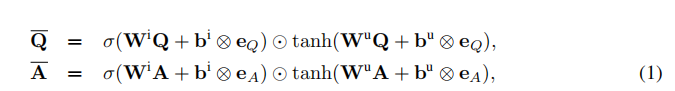

where ⊙ is element-wise multiplication, and Wi,Wu ∈ R l×d and bi, bu ∈ Rl are parameters to be learned. The outer product (· ⊗ eX) produces a matrix or row vector by repeating the vector or scalar on the left for X times.

The attention layer is built on top of the resulting Q and A as follows:
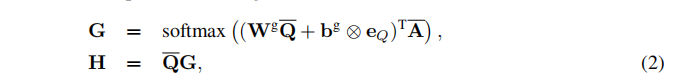

where Wg ∈ Rl×l and bg ∈ Rl are parameters to be learned, G ∈ RQ×A is the attention weight matrix, and H ∈ Rl×A are the attention-weighted vectors. Specifically, hj , which is the j-th column vector of H, is a weighted sum of the column vectors of Q and represents the part of Q that best matches the j-th word in A. Next we will combine hj and aj using a comparison function.

### 2.3 COMPARISON
The goal of the comparison layer is to match each aj , which represents the j-th word and its context in A, with hj , which represents a weighted version of Q that best matches aj . Let f denote a comparison function that transforms aj and hj into a vector tj to represent the comparison result.

A natural choice of f is a standard neural network layer that consists of a linear transformation followed by a non-linear activation function. For example, we can consider the following choice:
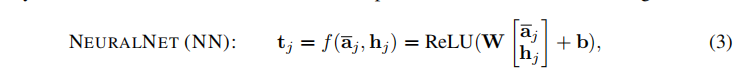

where tensor T[1...l] ∈ Rl×l×l and vector b ∈ Rl are parameters to be learned.

However, we note that for many sequence matching problems, we intend to measure the semantic similarity or relatedness of the two sequences. So at the word level, we also intend to check how similar or related aj is to hj . For this reason, a more natural choice used in some previous work is Euclidean distance or cosine similarity between aj and hj . We therefore consider the following definition of f:

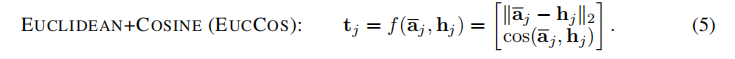

Note that with EUCCOS, the resulting vector tj is only a 2-dimensional vector. Although EUCCOS is a well-justified comparison function, we suspect that it may lose some useful information from the original vectors aj and hj . On the other hand, NN and NTN are too general and thus do not capture the intuition that we care mostly about the similarity between aj and hj .

To use something that is a good compromise between the two extreme cases, we consider the following two new comparison functions, which operate on the two vectors in an element-wise manner. These functions have been used previously by Tai et al. (2015).

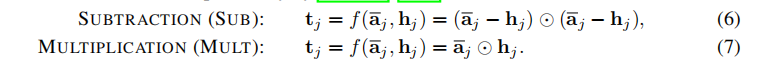

Note that the operator ⊙ is element-wise multiplication. For both comparison functions, the resulting vector tj has the same dimensionality as aj and hj .

We can see that SUB is closely related to Euclidean distance in that Euclidean distance is the sum of all the entries of the vector tj produced by SUB. But by not summing up these entries, SUB preserves some information about the different dimensions of the original two vectors. Similarly, MULT is closely related to cosine similarity but preserves some information about the original two vectors.

Finally, we consider combining SUB and MULT followed by an NN layer as follows:

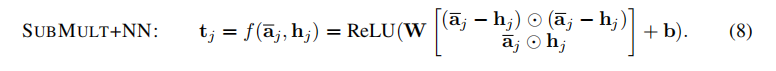

In summary, we consider six different comparison functions: NN, NTN, EUCCOS, SUB, MULT and SUBMULT+NN. Among these functions, the last three (SUB, MULT and SUBMULT+NN) have not been widely used in previous work for word-level matching.

### 2.4 AGGREGATION
After we apply the comparison function to each pair of aj and hj to obtain a series of vectors tj , finally we aggregate these vectors using a one-layer CNN:
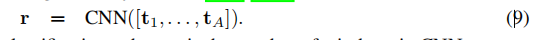
r ∈ Rnl is then used for the final classification, where n is the number of windows in CNN.

## 2方法
在本节中，我们提出了一个遵循“比较-聚合”框架的通用模型来匹配两个序列。这个通用模型可以应用于不同的任务。我们将重点讨论可以插入这个通用“比较-聚合”模型的六个不同的比较函数。特别是，我们假设两个基于元素操作的比较函数，SUB和MULT，在使用标准神经网络模型的高度灵活的函数和基于余弦相似度和/或欧氏距离的高度受限的函数之间是很好的中间地带。正如我们将在实验部分中展示的，这些基于元素明智操作的比较函数确实可以很好地处理许多序列匹配问题。

### 2.1问题定义和模型概述
我们考虑的序列匹配问题的一般设置如下。我们假设有两个序列要匹配。我们使用两个矩阵Q∈Rd×Q和A∈Rd×A来表示两个序列的词嵌入，其中Q和A分别是两个序列的长度，d是词嵌入的维数。换句话说，Q或A的每个列向量都是一个表示单个单词的嵌入向量。鉴于一对问答,目的是预测一个标签y。例如,在文本蕴涵,问可能代表一个前提和假设,和y表示问是否需要或与A问题回答,问可能是一个问题,候选人回答,和y表示是否正确答案问。

我们把这个问题当作监督学习任务。我们假设给定了一组(Q, A, y)形式的训练示例，我们的目标是学习一个将任意一对(Q, A)映射到y的模型。

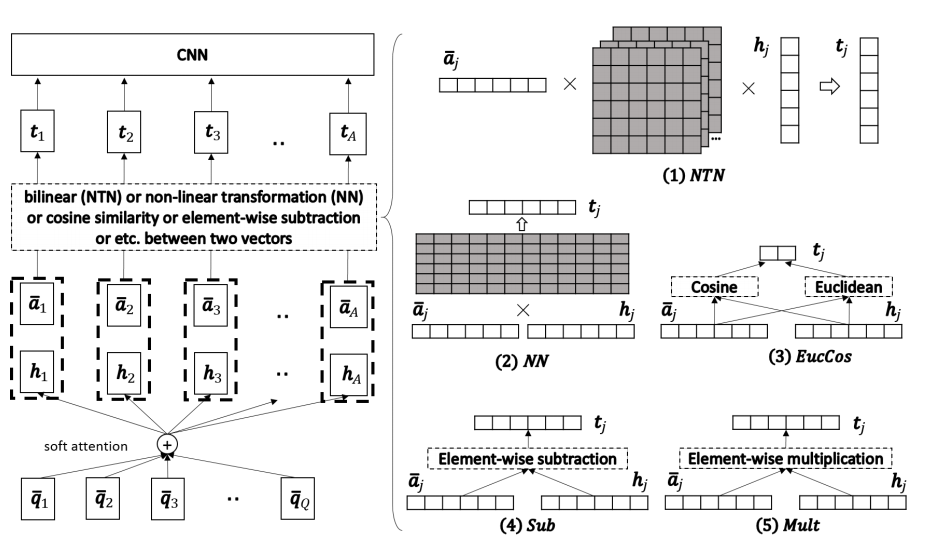
图1:左边是模型的概述。右侧显示了不同比较函数的详细信息。黑色矩形表示需要学习的参数。×表示矩阵乘法。

我们的模型的概述如图1所示。模型可分为以下四层:

* 1.预处理:我们使用一个预处理层(图中未显示)来处理Q和a，得到两个新的矩阵Q∈Rl×Q和a∈Rl×a。其目的是为每个序列中的每个单词获取一个新的嵌入向量，该向量除了捕获单词本身外，还捕获一些上下文信息。例如，qi∈Rl是Q的第i列向量，将Q中的第i个单词及其上下文编码在Q中。

* 2.注意力:我们使用一个标准的注意力机制在Q和获得关注权重在问每一个列向量的列向量a与这些权重的关注,对于每一个列向量的aj,得到相应的向量hj,这是一个attention-weighted问的列向量。

* 3.比较:我们使用比较函数f将每一对aj和hj组合成一个向量tj。

* 4.聚合:我们使用一个CNN层来聚合向量tj的序列，以进行最终的分类。

虽然该模型与Parikh等人(2016)提出的模型大体相同，但我们的工作存在一些显著的差异。首先，我们将重点介绍比较函数f，并比较一些选项，包括一些基于元素操作的不常见选项。其次，我们将我们的模型应用于代表四个不同任务的四个不同的数据集来评估它对于序列匹配问题的一般有效性。与Parikh等人(2016)的工作相比，还有其他一些不同之处。例如，我们使用CNN层而不是求和和连接来进行聚合。我们的注意力机制是单向的，而不是双向的。

在本节的其余部分，我们将详细介绍该模型。我们将主要关注比较函数。

### 2.2预处理及注意事项
我们的预处理层使用一个递归神经网络来处理这两个序列。我们使用LSTM/GRU的一个修改版本，我们只保留输入门来记住有意义的单词:
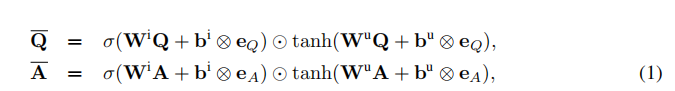
其中⊙∈Rl×d, Wi,Wu∈Rl×d, bi, bu∈Rl为待学习参数。外产品(·⊗eX)产生一个矩阵或行向量通过重复左边的矢量和标量X乘以。

注意层建立在结果Q和A之上，如下所示:
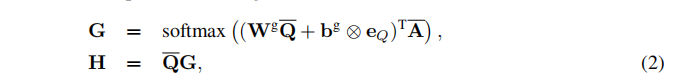

其中Wg∈Rl×l和bg∈Rl为待学习参数，G∈RQ×A为注意权矩阵，H∈Rl×A为注意加权向量。具体来说，hj是H的第j列向量，是Q的列向量的加权和，表示Q中与A中第j个单词最匹配的部分。

### 2.3比较
比较层的目标是将每个aj(表示第j个单词及其在A中的上下文)与hj(表示最匹配aj的Q的加权版本)进行匹配。设f表示将aj和hj转换成向量tj表示比较结果的比较函数。

f的自然选择是一个标准的神经网络层，它由一个线性变换和一个非线性激活函数组成。例如，我们可以考虑以下选择:
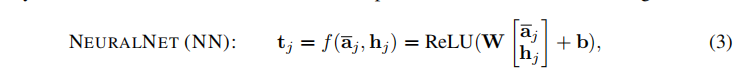
在张量T [1…l]∈Rl×l×l和向量b∈Rl是需要学习的参数。

然而，我们注意到，对于许多序列匹配问题，我们打算测量两个序列的语义相似性或相关性。所以在单词层面上，我们也想要检查aj和hj有多相似或相关。因此，在以前的一些工作中，更自然的选择是使用欧几里德距离或aj和hj之间的余弦相似性。因此，我们认为f的定义如下:

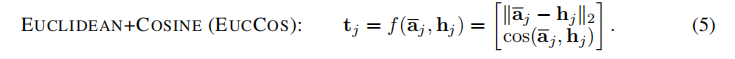

注意，使用EUCCOS，得到的向量tj只是一个二维向量。虽然EUCCOS是一个很好的比较函数，但是我们怀疑它可能会丢失一些来自原始向量aj和hj的有用信息。另一方面，NN和NTN太过一般化，因此没有抓住我们主要关心aj和hj之间相似性的直觉。

为了在这两种极端情况之间使用一种折衷的方法，我们考虑以下两个新的比较函数，它们以元素的方式对这两个向量进行操作。Tai等人(2015)曾使用过这些函数。

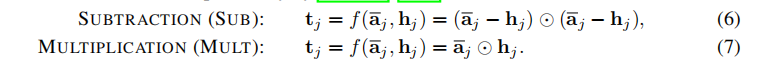

注意，操作符⊙是元素乘。对于这两个比较函数，得到的向量tj的维数与aj和hj相同。

我们可以看到，SUB与欧氏距离关系密切，因为欧氏距离是由SUB产生的向量tj的所有元素的和，但是通过不把这些元素加起来，SUB保留了一些关于原始两个向量不同维度的信息。类似地，MULT与余弦相似度密切相关，但保留了原始两个向量的一些信息。

最后，我们考虑将SUB和MULT与一个NN层结合，如下:

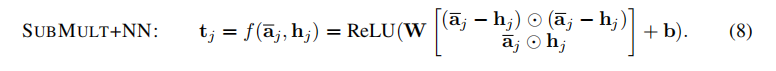

总之，我们考虑了6个不同的比较函数:NN、NTN、EUCCOS、SUB、MULT和SUBMULT+NN。在这些函数中，后三个(SUB、MULT和SUBMULT+NN)在以前的词级匹配工作中没有得到广泛的应用。

### 2.4聚合
将比较函数应用于每一对aj和hj，得到一系列的向量tj，最后使用单层CNN将这些向量集合起来:
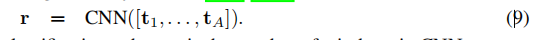

然后使用r∈Rnl进行最终分类，其中n为CNN中的窗口数。

## 4 RELATED WORK
We review related work in three types of general structures for matching sequences. 

Siamense network: These kinds of models use the same structure, such as RNN or CNN, to build the representations for the sequences separately and then use them for classification. Then cosine similarity, element-wise operation or neural network-based combination Bowman et al. (2015) are used for sequence matching.

Attentive network: Soft-attention mechanism (Bahdanau et al., 2014) has been widely used for sequence matching in machine comprehension , text entailment and question answering . Instead of using the final state of RNN to represent a sequence, these studies use weighted sum of all the states for the sequence representation.

Compare-Aggregate network: This kind of framework is to perform the word level matching. Our work is under this framework. But our structure is different from previous models and our model can be applied on different tasks. Besides, we analyzed different word-level comparison functions separately.

## 4相关工作
我们回顾了三种匹配序列的一般结构的相关工作。

Siamense网络:这类模型使用相同的结构，如RNN或CNN，分别建立序列的表示，然后进行分类。然后利用余弦相似度、元素智能操作或基于神经网络的组合Bowman等(2015)进行序列匹配。

注意网络:软注意机制广泛应用于机器理解、文本蕴涵和问题回答的序列匹配。这些研究没有使用RNN的最终状态来表示序列，而是使用所有状态的加权和来表示序列。

比较-聚合网络:这种框架用于执行词级匹配。我们的工作就是在这个框架下进行的。但我们的结构不同于以往的模型，我们的模型可以应用于不同的任务。此外，我们还分别分析了不同的词级比较函数。